## Name : Omkar Thawakar
Reg No : 2015BCS003 , Roll No : A-08
##### Aim : Implement multilayer neural network to classify the 2-D parity function

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class NN:
    def __init__(self,layers,l1_neurons,l2_neurons,eta=0.1):
        self.layers = layers
        self.l1_n = l1_neurons
        self.l2_n = l2_neurons
        self.eta=eta
        
    def init_weights(self,X):
        self.w = np.random.random((self.l2_n,self.l1_n+1))
        self.v = np.random.random((self.l1_n,np.array(X).shape[1]+1))
        
    def aug_inputs(self,X):
        for x in X:
            x.insert(0,-1)
        return X
 
    def train(self,X,outputs,epochs):
        self.v = self.v
        self.w =self.w
        #print("Initial Weights : ",self.weights)
        X = self.aug_inputs(X)
        #print("Augmented input pattern : ",X)
        self.error_ = []
        epoch=1
        p = 0
        for i in range(epochs):
            #print("Epoch : ",epoch)
            err=0
            #calculate the delta for hiden layers
            for x,d in zip(X,outputs):
                #calculate output of hidden layer
                #print('For hidden layer ......')
                out = self.predict(x,self.v)
                #print("For input pattern : ",x)
                #print("Output of hidden layer : ",out)
                
                #calculate output of output layer
                #print('for output layer....')
                out_inputs = np.insert(out,0,-1) #augmented input pattern of output layer
                out_out = self.predict(out_inputs,self.w)
                #print("output of output layer : ",out_out)
                
                #Calculate Delta(Error signa term) for output layer
                del_w = []
                for d_,o_ in zip(d,out_out):
                    del_w.append(((d_-o_)*o_*(1-o_)))
                #print("Error Signal term of output layer : ",del_w) 
                
                #Calculate Delta(Error signa term) for hidden layer
                del_v = []
                for o_ in out:
                    for i in range(len(self.w)):
                        temp_sum = 0
                        for j in range(len(self.w[i])):
                            temp_sum+=del_w*self.w[:,i]
                        #print(o_,temp_sum)
                        del_v.append(o_*(1-o_)*temp_sum)
                #print("Error Signal Term of Hidden layer : ",del_v)
                
                #adjust the weight of output layers
                delta_w = []
                for _ in del_w:
                    delta_w.append(self.eta*_*np.array(out_inputs))
                #print("$$ : ",delta_w)
                for _ in range(len(self.w)):
                    self.w[i] = self.w[i] + delta_w[i]   
                #print("Adjusted weights of output layer : ",self.w)
                
                #adjust the weight of hidden layers
                delta_v = []
                for _ in del_v:
                    delta_v.append(self.eta*_*np.array(x))
                #print("$$ : ",delta_v)
                self.v = self.v + np.array(delta_v)
   
                #print("Adjusted weights of hidden layer : ",self.v)
                
                err = d-out_out   
            
                p+=1
                
            self.error_.append(sum(np.array(err)**2)/2)    
            epoch+=1
            #print("weights of hidden layer : ",self.v)
            #print("weights of output layer : ",self.w)
            #print("Error : ",sum(np.array(err)**2)/2)
            #print('='*100)
            if self.error_[-1] <=0.001 :
                break     
        print("Training Steps Required are {} .".format(p))
        print("Final Error : ",self.error_[-1])
        
        return self
                                                                           
    def get_weights(self):
        return self.weights
                                                                           
    def net_input(self,X,weights):
        return np.dot(weights,X)
    
    def activation(self,net):
        return 1/(1+np.exp(-net))
        
    def gradient(self,out):
        return out*(1-out)
 
    def predict(self,x,weights):
        #print("Net : ",self.net_input(np.array(x),weights))
        net = self.net_input(np.array(x),weights)
        return self.activation(net)
        

In [41]:
X = [[0,0],[0,1],[1,0],[1,1]]
d = [[0],[1],[1],[0]]

nn = NN(2,2,1,eta=0.1)
nn.init_weights(X)
print("Initial Weights of hidden layer are : ",nn.v)
print("Initial Weights of output layer are : ",nn.w)
nn.train(X,d,10000)

Initial Weights of hidden layer are :  [[ 0.05217011  0.02435853  0.42940444]
 [ 0.06640459  0.50304022  0.55880347]]
Initial Weights of output layer are :  [[ 0.68471551  0.9729658   0.27072627]]
Training Steps Required are 40000 .
Final Error :  0.0019770444364


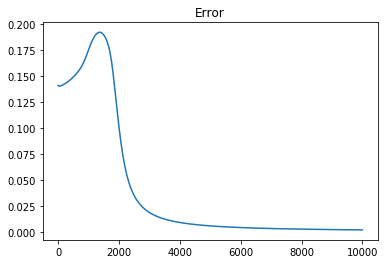

In [42]:
plt.plot(nn.error_)
plt.title('Error')
plt.show()

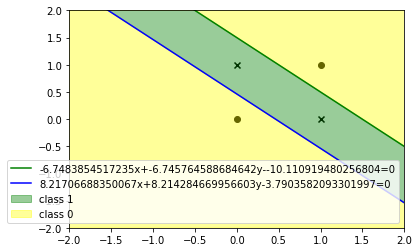

In [62]:
for i,j in zip(X,d):
    plt.scatter(i[1],i[2],c='k' ,marker='x' if j==[1]  else 'o' )

    
x = np.arange(-10,15)
c1,a1,b1 = nn.v[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='{}x+{}y-{}=0'.format(a1,b1,c1))

c2,a2,b2 = nn.v[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='{}x+{}y-{}=0'.format(a2,b2,c2))

plt.fill_between(x,y1,y2,color='green',alpha=0.4,label='class 1')
plt.fill_between(x,y2,-2,color='yellow',alpha=0.4,label='class 0')
plt.fill_between(x,y1,2,color='yellow',alpha=0.4)

plt.ylim([-2,2])
plt.xlim([-2,2])
plt.legend()
plt.show()

### after training weights of hidden layer

In [44]:
nn.v

array([[-10.11091948,  -6.74838545,  -6.74576459],
       [  3.79035821,   8.21706688,   8.21428467]])

### after training weights of output layer

In [45]:
nn.w

array([[ 8.92871213,  6.07116657,  6.02697273]])

In [46]:
nn.error_[-1]

0.0019770444363961565

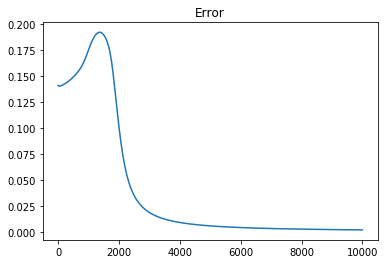

In [47]:
plt.plot(nn.error_)
plt.title('Error')
plt.show()

### Visualization of Decision Boundaries

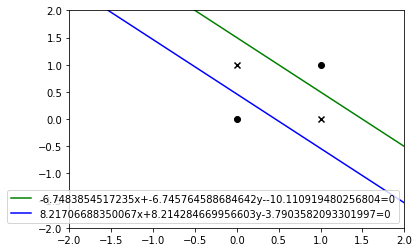

In [48]:
for i,j in zip(X,d):
    plt.scatter(i[1],i[2],c='k' ,marker='x' if j==[1]  else 'o' )

    
x = np.arange(-10,15)
c1,a1,b1 = nn.v[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='{}x+{}y-{}=0'.format(a1,b1,c1))

c2,a2,b2 = nn.v[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='{}x+{}y-{}=0'.format(a2,b2,c2))

plt.ylim([-2,2])
plt.xlim([-2,2])
plt.legend()
plt.show()